<a href="https://colab.research.google.com/github/DiogoVilasBoas/Estudo/blob/master/desafio_Notas%20do%20Enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapas
1. inserir as bibliotecas
2. carregar os dados
3. Analisar e escolher as features
4. Tratar os dados
5. Testar vários modelos e escolho um
6. Aplicar o modelo escolhido na base de treino
6. Exportar o resultado

# 1.Inserindo as bibliotecas

In [0]:
#importando bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from google.colab import drive
from datetime import datetime
from google.colab import files

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# 2. Carregando os dados

In [0]:
dados_teste = pd.read_csv("test.csv")
dados_treino = pd.read_csv("train.csv")

# 3. Analisando os dados e escolhendo as features

In [3]:
#definindo os dados utilizados no treino para o desafio 1 para uma correlação maior ue 0.3
correlacao = dados_treino.corr()[dados_treino.corr()['NU_NOTA_MT']>0.25]['NU_NOTA_MT']
feature_correlacao = correlacao.index.to_list()
feature_correlacao.remove('NU_NOTA_MT')
print(feature_correlacao)
#usando como critério 0,3 entraria as notas comp2~5 mas não a 1 o que não faria sentido
#farei o teste usando 0,3  e 0,2 e adotarei o melhor resultado

['TP_DEPENDENCIA_ADM_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']


In [4]:
#analisando os dados
notas = dados_treino[['NU_NOTA_MT','TP_DEPENDENCIA_ADM_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']]
notas.describe()


,NU_NOTA_MT,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,10133.000000,4282.000000,10341.000000,10341.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000
mean,482.497928,2.259692,473.495155,529.661087,516.472841,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258
std,99.826323,0.698586,71.093674,73.726344,68.688190,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,408.900000,2.000000,419.900000,480.400000,468.100000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000
50%,461.200000,2.000000,459.800000,532.000000,520.900000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000
75%,537.600000,2.000000,514.500000,581.200000,564.900000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000
max,952.000000,4.000000,806.400000,807.000000,763.600000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Text major ticklabel objects>)

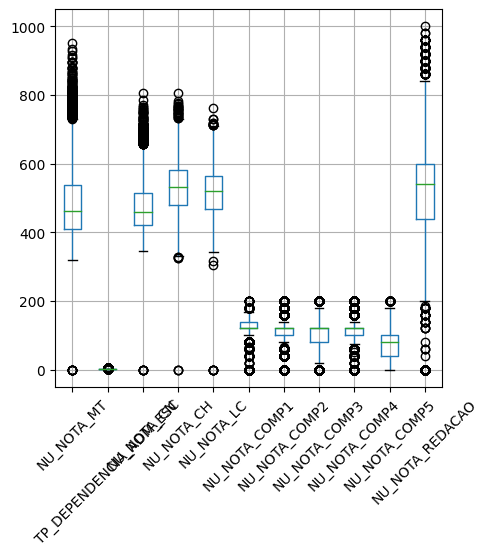

In [5]:
plt.figure(figsize=(5, 5), dpi=100) #indica o tamanho da figura
notas.boxplot(column=['NU_NOTA_MT','TP_DEPENDENCIA_ADM_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'])  #constroi o boxplot
plt.xticks(rotation=45)
#existem 3 escalas diferentes, uma indo de:
#1 a 4 (TP DEPENDENCIA ADM ESC),
#de 400 a 1000(nota CN CH LC redação)
#de 100 a 200(nota das comps) lembrando que a soma dessas notas é a nota de redação e eu devo tomar cuidado
#com essa diferença de escala talvez seja necessário um scaler e talvez desconsiderar a nota da redação

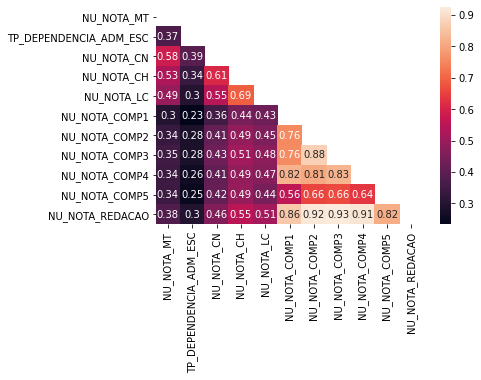

In [6]:
corr = notas.corr()

mask_ut=np.triu(np.ones(corr.shape)).astype(np.bool)
mask_ut[0:len(corr),0:len(corr)]
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True,
        mask=mask_ut)
# de fato fez sentido utilitazar a ntoa da comp1 visto que ela é 0,3 bem em cima do limite previamente estipulado
#logo fez sentido utilizar features com correlação maior que 0,2

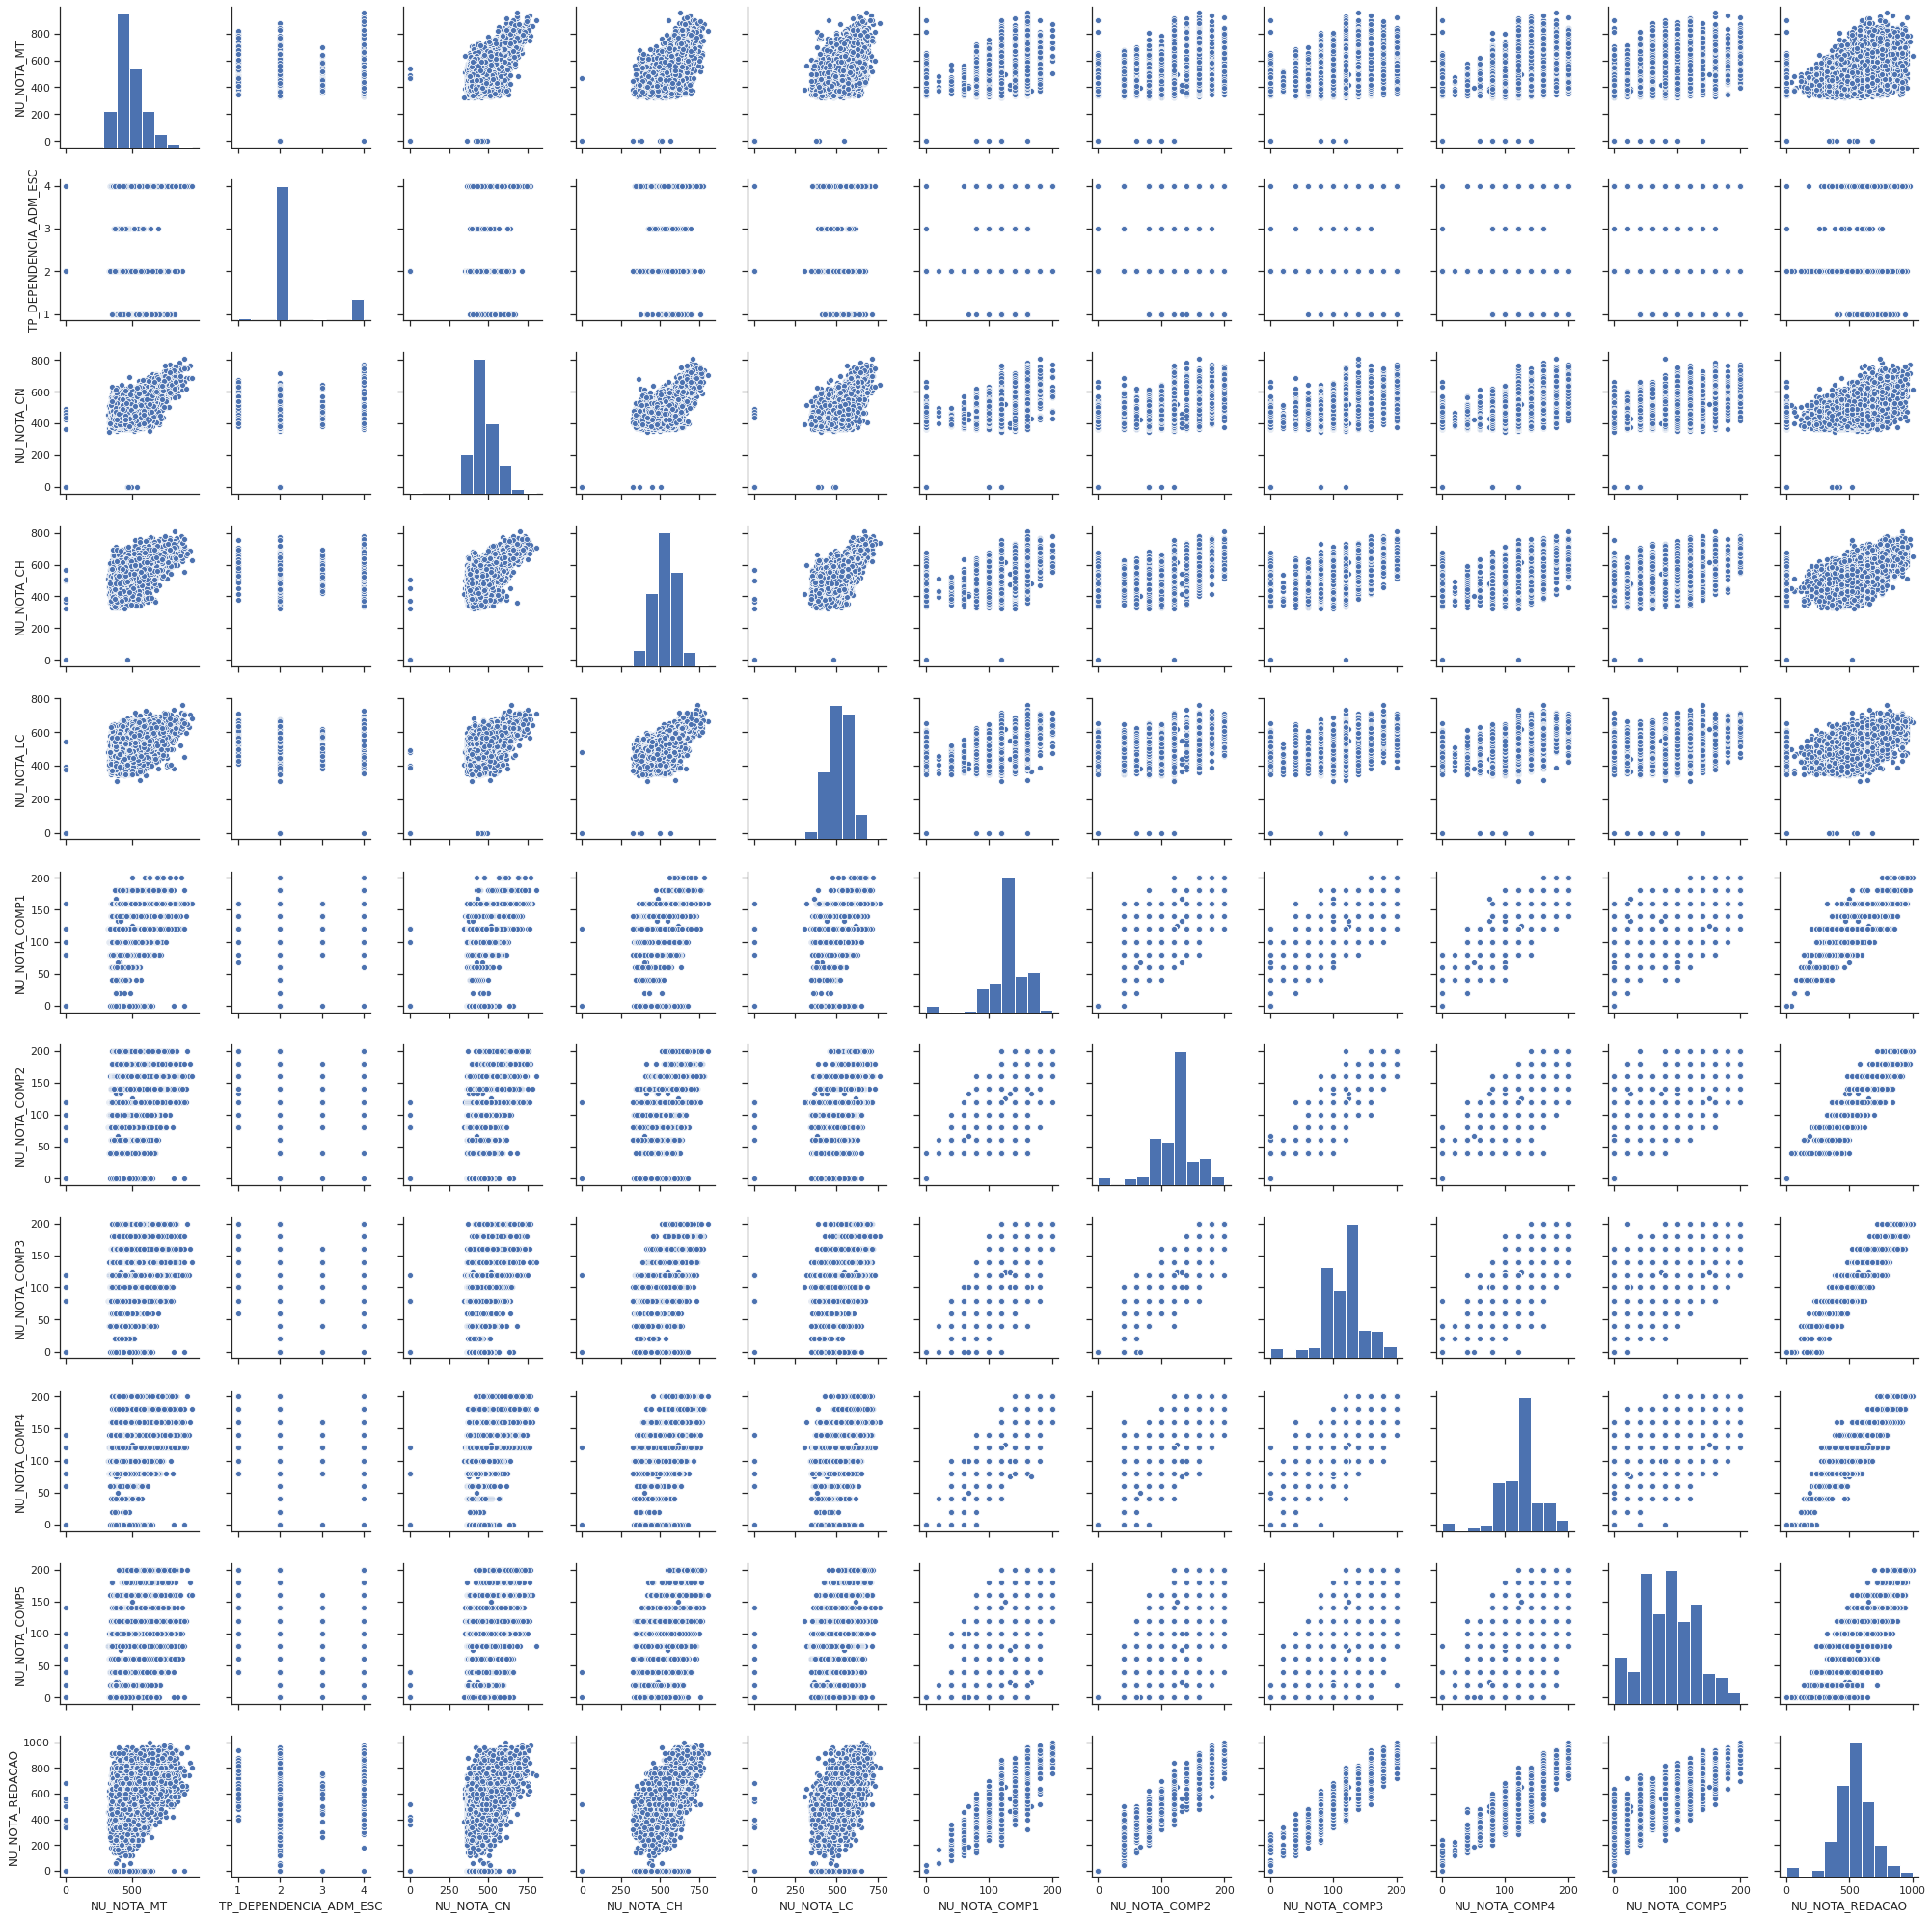

In [7]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(notas, palette="husl")
# o comportamento das notas são muito parecidos já a o comportamento da redação e das comps se diferem um pouco
#o comportamento da TP_DEPENDENCIA_ADM_ESC é diferente dos demais mas demonstra notas maiores para quem apresenta valor de 1
#de fato o scaler poderá fazer sentido

# 4. Tratando os dados

In [0]:
#para evitar erros vou substituir os dados nulos por zero
#primeiro eu havia considerado substituir pela média o R2score ficou muito baixo no comparativo
notas2 = notas.copy()
notas2["NU_NOTA_CN"].fillna(value = 0, inplace=True)
notas2["NU_NOTA_CH"].fillna(value = 0, inplace=True)
notas2["NU_NOTA_LC"].fillna(value = 0, inplace=True)
notas2["NU_NOTA_MT"].fillna(value = 0, inplace=True)
notas2["NU_NOTA_REDACAO"].fillna(value = 0, inplace=True)
notas2["NU_NOTA_COMP1"].fillna(value = 0, inplace=True)
notas2["NU_NOTA_COMP2"].fillna(value = 0, inplace=True)
notas2["NU_NOTA_COMP3"].fillna(value = 0, inplace=True)
notas2["NU_NOTA_COMP4"].fillna(value = 0, inplace=True)
notas2["NU_NOTA_COMP5"].fillna(value = 0, inplace=True)
notas2["TP_DEPENDENCIA_ADM_ESC"].fillna(value = 0, inplace=True)

#agora para os dados de teste
teste2 = dados_teste.copy()
teste2["NU_NOTA_CN"].fillna(value = 0, inplace=True)
teste2["NU_NOTA_CH"].fillna(value = 0, inplace=True)
teste2["NU_NOTA_LC"].fillna(value = 0, inplace=True)
teste2["NU_NOTA_REDACAO"].fillna(value = 0, inplace=True)
teste2["NU_NOTA_COMP1"].fillna(value = 0, inplace=True)
teste2["NU_NOTA_COMP2"].fillna(value = 0, inplace=True)
teste2["NU_NOTA_COMP3"].fillna(value = 0, inplace=True)
teste2["NU_NOTA_COMP4"].fillna(value = 0, inplace=True)
teste2["NU_NOTA_COMP5"].fillna(value = 0, inplace=True)
teste2["TP_DEPENDENCIA_ADM_ESC"].fillna(value = 0, inplace=True)

In [9]:
#separação dos dados de teste e treino do modelo
y = notas2[['NU_NOTA_MT']]
x = notas2[['TP_DEPENDENCIA_ADM_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']].astype(int)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size =0.25, random_state =40)
print(x_treino.shape, x_teste.shape,y_treino.shape,y_teste.shape)

(10297, 10) (3433, 10) (10297, 1) (3433, 1)


# 5. Aplicando os modelos

In [0]:
#agora usando o minmax scaler
#scaler = MinMaxScaler()
scaler = StandardScaler()
rescaled_x = pd.DataFrame(scaler.fit_transform(x))
REx_treino, REx_teste, REy_treino, REy_teste = train_test_split(rescaled_x, y, test_size =0.25, random_state =40)

In [0]:
def Regressao(i_treino,i_teste,j_treino,j_teste):
  regressor = linear_model.LinearRegression()
  regressor.fit(i_treino, j_treino)
  MT_previsao = regressor.predict(i_teste)
  previsao = pd.concat([i_teste,j_teste], axis=1)
  previsao['previsao']=MT_previsao
  return previsao

In [12]:
modelo1 = Regressao(x_treino,x_teste,y_treino,y_teste)
modelo1_rescaled = Regressao(REx_treino,REx_teste,REy_treino, REy_teste)
modelo1_rescaled.head()

#percebi algo interessante, tenta acertar mesmo os número muito próximos de zero mas é de conhecimento que no enem a nota minima
#foi maior que 100 pelo menos então vou substituir os valores onde a previsão foi menor que 100 por zero

,0,1,2,3,4,5,6,7,8,9,NU_NOTA_MT,previsao
581,1.159451,1.017031,0.765506,0.508263,1.221649,1.705523,1.463230,1.679698,1.251414,1.529667,555.4,523.759837
1944,-0.630839,0.636906,0.989152,1.028630,1.221649,1.355327,1.463230,1.331619,1.251414,1.380268,600.3,562.474680
4945,-0.630839,-1.671998,-1.681937,-1.624391,-1.509181,-1.446240,-1.421342,-1.453016,-1.136109,-1.458311,0.0,-3.615163
5516,-0.630839,0.622828,0.516542,0.482671,1.221649,0.654935,0.742087,0.983540,1.251414,1.006771,517.9,483.291087
4954,1.159451,0.627521,0.330874,0.550916,0.538941,0.654935,0.742087,0.635460,1.251414,0.782672,463.3,497.318430


In [13]:
for index, row in modelo1.iterrows():
  if row['previsao'] <= 100:
    modelo1.loc[index, 'previsao'] = 0

modelo1.head()
for index, row in modelo1_rescaled.iterrows():
  if row['previsao'] <= 100:
    modelo1_rescaled.loc[index, 'previsao'] = 0

modelo1_rescaled.head()

,0,1,2,3,4,5,6,7,8,9,NU_NOTA_MT,previsao
581,1.159451,1.017031,0.765506,0.508263,1.221649,1.705523,1.463230,1.679698,1.251414,1.529667,555.4,523.759837
1944,-0.630839,0.636906,0.989152,1.028630,1.221649,1.355327,1.463230,1.331619,1.251414,1.380268,600.3,562.474680
4945,-0.630839,-1.671998,-1.681937,-1.624391,-1.509181,-1.446240,-1.421342,-1.453016,-1.136109,-1.458311,0.0,0.000000
5516,-0.630839,0.622828,0.516542,0.482671,1.221649,0.654935,0.742087,0.983540,1.251414,1.006771,517.9,483.291087
4954,1.159451,0.627521,0.330874,0.550916,0.538941,0.654935,0.742087,0.635460,1.251414,0.782672,463.3,497.318430


In [14]:
R1 =r2_score(modelo1['NU_NOTA_MT'],modelo1['previsao'])
R1_rescaled =r2_score(modelo1_rescaled['NU_NOTA_MT'],modelo1_rescaled['previsao'])
print(R1, R1_rescaled)
# o rescale Min e Max não melhorou o resultado
# o standard scale foi melhor contudo contribuiu pouco para o resultado

0.9065469265578748 0.9065680173936573


In [0]:
def modelo_SVR(i_treino,i_teste,j_treino,j_teste):
  regressor_svr = SVR(C=10000)
  regressor_svr.fit(i_treino, j_treino)
  MT_previsao = regressor_svr.predict(i_teste)
  previsao = pd.concat([i_teste,j_teste], axis=1)
  previsao['previsao']=MT_previsao
  return previsao

In [16]:
modelo2 = modelo_SVR(x_treino,x_teste,y_treino,y_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
for index, row in modelo2.iterrows():
  if row['previsao'] <= 100:
    modelo2.loc[index, 'previsao'] = 0

modelo2.head()

,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT,previsao
581,2,573,580,500,160,180,160,180,120,800,555.4,564.416666
1944,0,492,633,622,160,160,160,160,120,760,600.3,523.784603
4945,0,0,0,0,0,0,0,0,0,0,0.0,0.000000
5516,0,489,521,494,160,120,120,140,120,660,517.9,465.036634
4954,2,490,477,510,120,120,120,120,120,600,463.3,436.160320


In [18]:
R2 =r2_score(modelo2['NU_NOTA_MT'],modelo2['previsao'])
print(R2)
#por hora o SVR tem apresentado o melhor resultado

0.9199272455007441


In [0]:
def modelo_MLP(i_treino,i_teste,j_treino,j_teste):
  regressor_MLP = MLPRegressor(max_iter=500)
  regressor_MLP.fit(i_treino, j_treino)
  MT_previsao = regressor_MLP.predict(i_teste)
  previsao = pd.concat([i_teste,j_teste], axis=1)
  previsao['previsao']=MT_previsao
  return previsao

In [20]:
modelo3 = modelo_MLP(x_treino,x_teste,y_treino,y_teste)
for index, row in modelo3.iterrows():
  if row['previsao'] <= 100:
    modelo3.loc[index, 'previsao'] = 0
modelo3.head()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT,previsao
581,2,573,580,500,160,180,160,180,120,800,555.4,561.764146
1944,0,492,633,622,160,160,160,160,120,760,600.3,532.864571
4945,0,0,0,0,0,0,0,0,0,0,0.0,0.000000
5516,0,489,521,494,160,120,120,140,120,660,517.9,490.066579
4954,2,490,477,510,120,120,120,120,120,600,463.3,479.983050


In [21]:
R3 =r2_score(modelo3['NU_NOTA_MT'],modelo3['previsao'])
print(R3)
#SVR foi melhor q MLP com 500 interações e aumentar o número máximo de interações não melhorou o resulado

0.9184321994329129


In [0]:
def modelo_GBR(i_treino,i_teste,j_treino,j_teste):
  regressor = GradientBoostingRegressor()
  regressor.fit(i_treino, j_treino)
  MT_previsao = regressor.predict(i_teste)
  previsao = pd.concat([i_teste,j_teste], axis=1)
  previsao['previsao']=MT_previsao
  return previsao


In [23]:
modelo4 = modelo_GBR(x_treino,x_teste,y_treino,y_teste)
for index, row in modelo4.iterrows():
  if row['previsao'] <= 100:
    modelo4.loc[index, 'previsao'] = 0
modelo4.head()

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT,previsao
581,2,573,580,500,160,180,160,180,120,800,555.4,540.645395
1944,0,492,633,622,160,160,160,160,120,760,600.3,519.391689
4945,0,0,0,0,0,0,0,0,0,0,0.0,0.000000
5516,0,489,521,494,160,120,120,140,120,660,517.9,455.983394
4954,2,490,477,510,120,120,120,120,120,600,463.3,447.927845


In [24]:
R4 =r2_score(modelo4['NU_NOTA_MT'],modelo4['previsao'])
print(R1, R2, R3, R4)
#por hora foi o melhor modelo

0.9065469265578748 0.9199272455007441 0.9184321994329129 0.9215118006519458


In [0]:
def modelo_Tree(i_treino,i_teste,j_treino,j_teste):
  regressor = DecisionTreeRegressor()
  regressor.fit(i_treino, j_treino)
  MT_previsao = regressor.predict(i_teste)
  previsao = pd.concat([i_teste,j_teste], axis=1)
  previsao['previsao']=MT_previsao
  return previsao

In [26]:
modelo5 = modelo_Tree(x_treino,x_teste,y_treino,y_teste)
for index, row in modelo5.iterrows():
  if row['previsao'] <= 100:
    modelo5.loc[index, 'previsao'] = 0
modelo5.head()

,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT,previsao
581,2,573,580,500,160,180,160,180,120,800,555.4,495.0
1944,0,492,633,622,160,160,160,160,120,760,600.3,480.8
4945,0,0,0,0,0,0,0,0,0,0,0.0,0.0
5516,0,489,521,494,160,120,120,140,120,660,517.9,413.1
4954,2,490,477,510,120,120,120,120,120,600,463.3,380.3


In [27]:
R5 =r2_score(modelo5['NU_NOTA_MT'],modelo5['previsao'])
print(R1, R2, R3, R4, R5)
#por hora foi o pior
#vou optar pelo SVR

0.9065469265578748 0.9199272455007441 0.9184321994329129 0.9215118006519458 0.8360088587953898


# 6. Aplicando na base inteira
Uma vez escolhido o SVR, eu vou treinar o meu modelo da resposta com todos os dados da minha base de treino e colocar para prever a nota de Matemática usando o SVR para logo em seguida transformar notas abaixo de 100 de matemática para zero.

In [37]:
y = notas2[['NU_NOTA_MT']].astype(int)
x = notas2[['TP_DEPENDENCIA_ADM_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']].astype(int)
teste = teste2[['TP_DEPENDENCIA_ADM_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']].astype(int)

regressor_svr = SVR(C=10000)
regressor_svr.fit(x, y['NU_NOTA_MT'])
MT_previsao = regressor_svr.predict(teste)
resultado = pd.DataFrame({'NU_INSCRICAO': dados_teste['NU_INSCRICAO']})
resultado['NU_NOTA_MT'] = MT_previsao
for index, row in resultado.iterrows():
  if row['NU_NOTA_MT'] <= 100:
    resultado.loc[index, 'NU_NOTA_MT'] = 0
resultado.head()


,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,413.698907
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,440.652717
2,b38a03232f43b11c9d0788abaf060f7366053b6d,623.721106
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.000000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,529.121675


# 7. Download do arquivo

In [0]:
#download do arquivo
resultado.to_csv('answer.csv', index = False)
files.download('answer.csv')